**Importing packages**

In [3]:
from sklearn.datasets import load_iris, load_diabetes
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, root_mean_squared_error

Testing and training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load datasets
trainning = pd.read_csv('trajnimi.csv')
testing = pd.read_csv('testimi.csv')

# Calculate and print mean shares
mean_share = trainning['shares'].mean()
print("Median shares:", mean_share)

# Drop the second column (if it's unnecessary)
trainning.drop(trainning.columns[1], axis=1, inplace=True)
testing.drop(testing.columns[1], axis=1, inplace=True)

# Remove articles with fewer than 5 words BEFORE splitting
initial_train_size = trainning.shape[0]
initial_test_size = testing.shape[0]

trainning = trainning[trainning["n_tokens_content"] >= 5].copy()
testing = testing[testing["n_tokens_content"] >= 5].copy()

removed_train = initial_train_size - trainning.shape[0]
removed_test = initial_test_size - testing.shape[0]

print(f"\nArticles removed from training set: {removed_train}")
print(f"Articles removed from testing set: {removed_test}")
print(f"Remaining training articles: {trainning.shape[0]}")
print(f"Remaining testing articles: {testing.shape[0]}")

# Split the cleaned training data into training and validation
trainning, validation = train_test_split(trainning, test_size=0.1, random_state=42)


Median shares: 3412.369541226549

Articles removed from training set: 951
Articles removed from testing set: 230
Remaining training articles: 30764
Remaining testing articles: 7699


**Normalizer**

In [79]:
from sklearn.preprocessing import StandardScaler

normalizer = Normalizer()
standard = StandardScaler()

**OUTLIER CHECKING**

**Visualising data**

C:\Users\aldod\AppData\Local\Temp\ipykernel_21888\3110779233.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_shares.index, y=avg_shares.values, palette=["blue", "red"])
C:\Users\aldod\AppData\Local\Temp\ipykernel_21888\3110779233.py:11: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=avg_shares.index, y=avg_shares.values, palette=["blue", "red"])


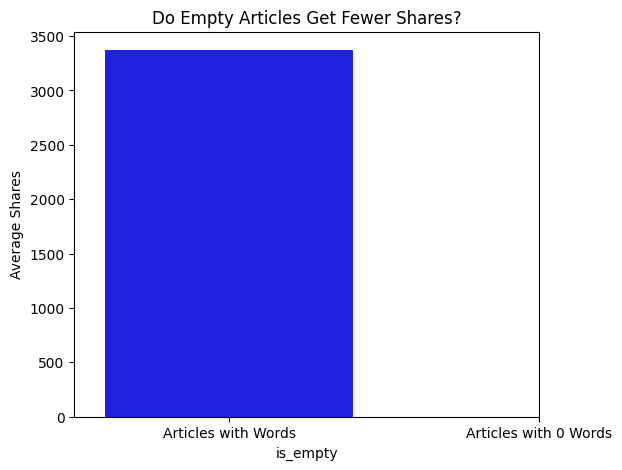

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a new column: Empty or Not
trainning["is_empty"] = trainning["n_tokens_content"] == 0

# Calculate average shares
avg_shares = trainning.groupby("is_empty")["shares"].mean()

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=avg_shares.index, y=avg_shares.values, palette=["blue", "red"])
plt.xticks([0, 1], ["Articles with Words", "Articles with 0 Words"])
plt.ylabel("Average Shares")
plt.title("Do Empty Articles Get Fewer Shares?")
plt.show()



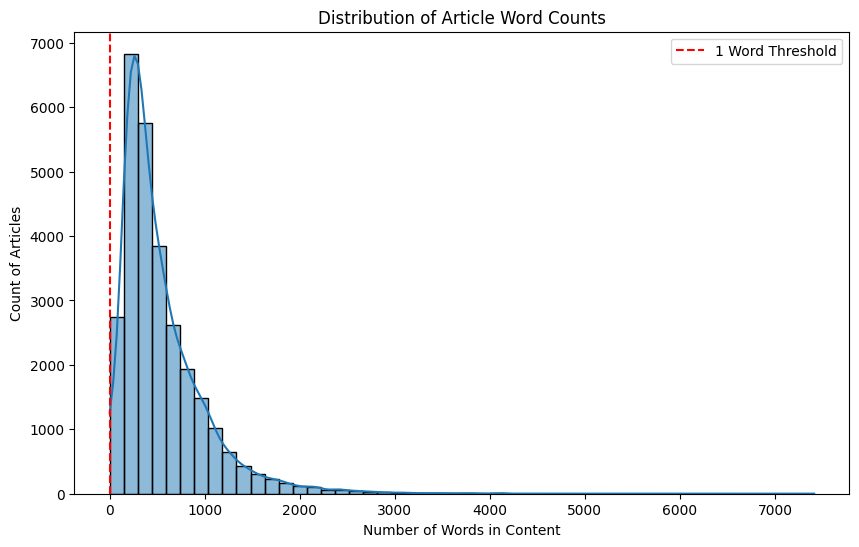

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(trainning["n_tokens_content"], bins=50, kde=True)
plt.axvline(x=1, color='r', linestyle='--', label="1 Word Threshold")
plt.xlabel("Number of Words in Content")
plt.ylabel("Count of Articles")
plt.title("Distribution of Article Word Counts")
plt.legend()
plt.show()


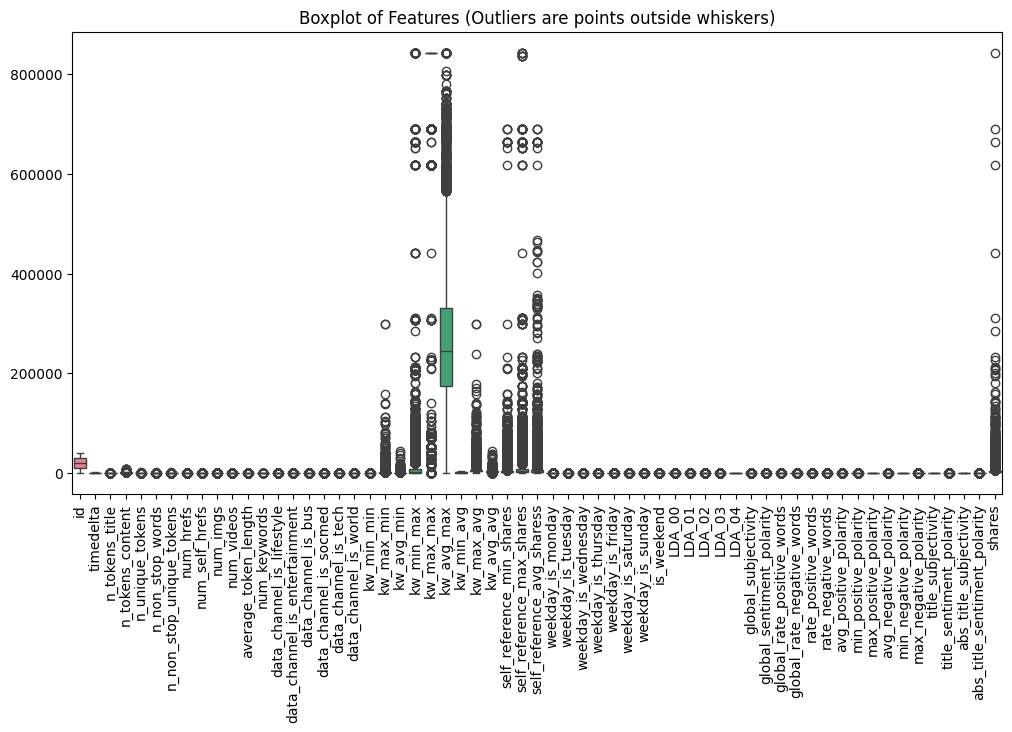

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=trainning)
plt.xticks(rotation=90)  # Rotate labels if needed
plt.title("Boxplot of Features (Outliers are points outside whiskers)")
plt.show()

#import seaborn as sns
#from matplotlib import pyplot as plt

#corr = trainning.corr()
#sns.heatmap(corr, annot=True)
#plt.show()


#sns.heatmap(trainning.isnull(), cmap="viridis", cbar=False, yticklabels=False)
#plt.show()

**Dimensionality reduction**

In [80]:
from sklearn.decomposition import TruncatedSVD

pca = PCA(n_components=20)
lda = LinearDiscriminantAnalysis(n_components=20)
svd = TruncatedSVD(n_components=20)

**Regression models**

In [29]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors, KDTree, NearestCentroid
from sklearn import tree
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor


# Ridge and Lasso Regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Polynomial Regression (using PolynomialFeatures + Linear Regression)
from sklearn.preprocessing import PolynomialFeatures

# Support Vector Regression (SVR)
from sklearn.svm import SVR

In [30]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# error 9556.269832967007
#Gabimi i validimit:  8440.275048247846, me outliers removed. lda, standard

In [32]:
linear_regression = LinearRegression() 
#Gabimi i validimit:  8521.826315180877, PCA =2
#Gabimi i validimit:  8517.287144531061, PCA=10
#Gabimi i validimit:  8471.609323343322, PCA=20
#Gabimi i validimit:  8478.399970116641, PCA=30
#Gabimi i validimit:  8473.399970116641
#Gabimi i validimit:  8543.07611156669, LDA=2
#Gabimi i validimit:  8513.122068565226, SVD=10

In [33]:
baysianRidge = BayesianRidge(alpha_1=0.001,alpha_2=1e-06 , lambda_1=1e-06, lambda_2= 0.001)
# gabimi 8509

In [ ]:
ridge = Ridge(alpha=0.1) 
#Gabimi i validimit:  8521.827705310838, PCA =2
#Gabimi i validimit:  8490.834442333213, PCA=20
#Gabimi i validimit:  8377.142708054524, PCA=20 with removal of articles with 0 words

In [87]:
lasso = Lasso(alpha=0.1) 
#8521.845345243471, PCA =2
#Gabimi i validimit:  8542.977488782783, 
#Gabimi i validimit:  8374.425082336695

In [36]:
elasticnet = ElasticNet() 
#Gabimi i validimit:  8541.948843280003, PCA=2

In [37]:
svr = SVR(kernel='rbf', C=100, gamma=0.1)
#Gabimi i validimit:  8751.67484668138, PCA=2

In [38]:
logistic_reg = LogisticRegression()
#Gabimi i validimit:  8838.725240410684, PCA=2

In [39]:
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, RationalQuadratic
kernel1 = RBF(length_scale=1.0, length_scale_bounds=(1e-07, 1e3))
mattern = Matern()
dotproduct = DotProduct()
rationalQuadratic = RationalQuadratic()
gausian = GaussianProcessRegressor()
#Gabimi i validimit:  8481.396704936627, PCA=2
#Gabimi i validimit:  167005.1634626944, PCA=20

In [40]:
kernel_ridge = KernelRidge()
#Gabimi i validimit:  9168.614781369433

In [41]:
gaussionNB = GaussianNB()
#Gabimi i validimit:  9493.566788576763

In [42]:
nearest_centroid = NearestCentroid()
#Gabimi i validimit:  67078.06768166047

In [43]:
decision_tree = tree.DecisionTreeRegressor()
#Gabimi i validimit:  12401.635034642473

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
# gabimi  = 8457.806672658462, normalizer, pca = 20
# Gabimi i validimit:  8433.360645178014, standard scaler, pca
# Gabimi i validimit:  8337.658499468587, standard scaler, lda,
#Gabimi i validimit:  8368.913447510045

**PIPELINE**

In [107]:
pipeline = Pipeline([
    ('standard', standard),
    ('pca', pca),
    ('model', lasso)
])

#training the model
pipeline.fit(trainning.drop('shares', axis=1), trainning['shares'])

#validating the model
predictions = pipeline.predict(validation.drop('shares', axis=1))

# the prediction, the lower the better
gabimi = root_mean_squared_error(validation['shares'], predictions)
print("Gabimi i validimit: ", gabimi)

#predictions = pipeline.predict(testing)
#predictions = pipeline.predict(testing[trainning.drop(columns=['shares']).columns])


#benchmark till now --> 8279 lasso pca standard, linear same score, 8283 elasticnet, 8280 baysianridge

Gabimi i validimit:  8279.622565747359


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline (Polynomial Features + Standardization + Linear Regression)
pipeline_poly = Pipeline([
    ('poly', PolynomialFeatures()),  # Polynomial feature transformation
    ('scaler', StandardScaler()),  # Scale features
])

# Define the hyperparameter grid (degree of polynomial)
param_grid_poly = {
    'poly__degree': [1, 2, 3, 4, 5]  # Try polynomial degrees from 1 to 5
}

# Perform Grid Search
grid_poly = GridSearchCV(pipeline_poly, param_grid_poly, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
grid_poly.fit(trainning.drop("shares", axis=1), trainning["shares"])

# Print the best polynomial degree
print("Best Polynomial Degree:", grid_poly.best_params_['poly__degree'])
print("Best RMSE Score:", -grid_poly.best_score_)  # Convert back to positive RMSE


Fitting 5 folds for each of 5 candidates, totalling 25 fits


**Saving the predictions**

In [ ]:
def ruaj_parashikimet(id, parashikimet, emri):
    # Ensure both inputs are Pandas Series for safe indexing
    id = pd.Series(id).reset_index(drop=True)
    parashikimet = pd.Series(parashikimet).reset_index(drop=True)

    # Find the minimum length to avoid mismatch
    min_length = min(len(id), len(parashikimet))

    # Truncate both to the same length
    id = id.iloc[:min_length]
    parashikimet = parashikimet.iloc[:min_length]

    # Save to CSV
    df = pd.DataFrame({"id": id, "shares": parashikimet})
    df.to_csv(emri, index=False)
    print(f"Predictions saved to {emri} with {min_length} entries.")

# Ensure testing['id'] and predictions have matching lengths before passing them
ruaj_parashikimet(testing['id'], predictions, "parashikimet_reg.csv")



Predictions saved to parashikimet_reg.csv with 3077 entries.


In [ ]:
def ruaj_parashikimet(id, parashikimet, emri):
    """
    @param predikimet një listë me predikimet
    @param emri emri i skedarit për të ruajtur predikimet
    """
    trainning= pd.DataFrame(columns=['id', 'shares'])
    trainning['id'] = id
    trainning['shares'] = parashikimet
    trainning.to_csv(emri, index=False)

ruaj_parashikimet(testing['id'], predictions, "parashikimet_reg.csv")